In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cleaned_data.csv')
df

,trending_date,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,state,lat,lon,geometry,Country,category_name
0,2017-11-13 18:30:00+00:00,Lokdhun Punjabi,1096327,33966,798,882,FALSO,FALSO,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),IN,Film & Animation
1,2017-11-13 18:30:00+00:00,HJ NEWS,590101,735,904,0,VERDADERO,FALSO,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),IN,News & Politics
2,2017-11-13 18:30:00+00:00,TFPC,473988,2011,243,149,FALSO,FALSO,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819),IN,Entertainment
3,2017-11-13 18:30:00+00:00,Eruma Saani,1242680,70353,1624,2684,FALSO,FALSO,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979),IN,Comedy
4,2017-11-13 18:30:00+00:00,Filmylooks,464015,492,293,66,FALSO,FALSO,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545),IN,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158695,2018-06-13 21:00:00+00:00,Портье Дрогба,70654,3806,87,230,FALSO,FALSO,Khakass,53.831325,91.222690,POINT (91.22268998 53.8313253),RU,Sports
158696,2018-06-13 21:00:00+00:00,Pastime Time,129488,5893,164,990,FALSO,FALSO,Volgograd,50.016106,45.426106,POINT (45.42610551 50.01610598),RU,People & Blogs
158697,2018-06-13 21:00:00+00:00,CaGArt,99163,4659,337,692,FALSO,FALSO,Komi,67.608288,64.123259,POINT (64.12325883 67.60828798),RU,Comedy
158698,2018-06-13 21:00:00+00:00,DaisyxBTS 07,449611,24808,93,974,FALSO,FALSO,Khakass,53.831325,91.222690,POINT (91.22268998 53.8313253),RU,Entertainment


In [7]:
date_df = df[['trending_date']].copy()
date_df['trending_date'] = date_df['trending_date'].apply(lambda x: x[:10])
date_df['trending_date'] = pd.to_datetime(date_df['trending_date'])
date_df['count'] = 1
date_df = date_df.groupby('trending_date').count()
date_df

,count
trending_date,
2017-11-13,564
2017-11-14,754
2017-11-15,775
2017-11-16,763
2017-11-17,767
...,...
2018-06-10,854
2018-06-11,860
2018-06-12,925


<Axes: xlabel='trending_date'>

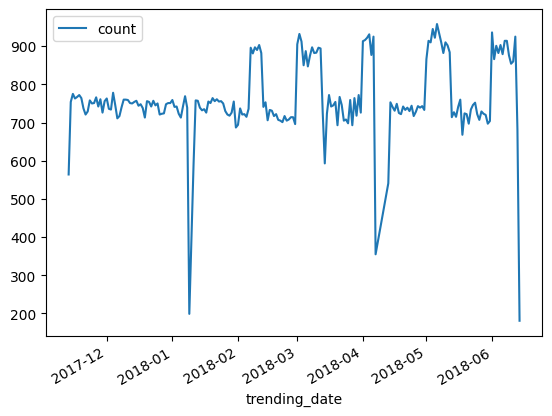

In [12]:
date_df.plot()

In [13]:
from functools import reduce

def get_bounds(ldf, column):
    q1 = ldf[column].quantile(0.25)
    q3 = ldf[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound


def get_outlier_count(ldf, column):
    lower_bound, upper_bound = get_bounds(ldf, column)
    return len(ldf[(ldf[column] < lower_bound) | (ldf[column] > upper_bound)])

def get_outlier_series(ldf):
    s = []
    for item in ldf.columns:
        lower_bound, upper_bound = get_bounds(ldf, item)
        s.append((ldf[item] < lower_bound) | (ldf[item] > upper_bound))

    return reduce(lambda x, y: x | y, s)

In [18]:
date_df[get_outlier_series(date_df)].sort_values(by='count', ascending=True)

,count
trending_date,
2018-06-14,181
2018-01-09,199
2018-04-07,355
2018-04-13,541
2017-11-13,564
2018-01-11,589
2018-03-14,593
2018-03-06,847
2018-03-04,850


In [ ]:
# 14/06/2018 dia del primer partido del mundial Russia 2018

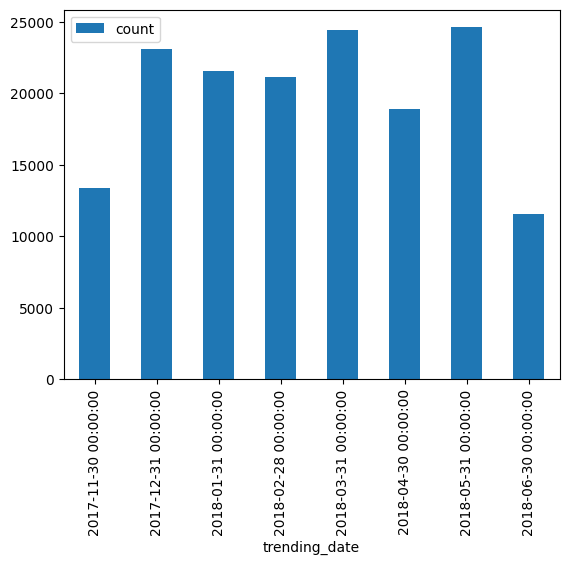

In [19]:
# Resample the data by month and sum the counts for each month
date_df_monthly = date_df.resample('M').sum()

# Create a bar plot of the resampled data
date_df_monthly.plot.bar()
plt.show()